<a href="https://colab.research.google.com/github/ankita111204/handwrittenDigitClassifierUsingCNN/blob/main/Handwritten_Digit_Classifier_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. IMPORT LIBRARIES

In [ ]:
# 📥 1. Import Libraries
#In this section, we import all the necessary libraries for building and evaluating our handwritten digit recognition model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


2. LOAD & PREPROCESS DATA

In [ ]:
# 📂 2. Load & Preprocess Data
#We load the MNIST dataset, normalize the image pixel values, and prepare the data for model training. If needed, we also reshape and one-hot encode the labels.

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Show the shape of data
print("Training Data Shape:", x_train.shape)
print("Testing Data Shape:", x_test.shape)

Training Data Shape: (60000, 28, 28)
Testing Data Shape: (10000, 28, 28)


3. Exploratory Data Analysis (EDA)

In [ ]:
# 📊 3. Exploratory Data Analysis (EDA)
#In this section, we explore the MNIST dataset to understand the distribution of digits and the structure of the image data.
### What we'll do:
#- Check the shape and format of training/testing data
#- Plot the class distribution of digits
#- Visualize a few random handwritten samples
#- Examine pixel intensity ranges
#- Generate the average image for each digit class

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


<ipython-input-64-ff502a0fbb8c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette="Blues_d")


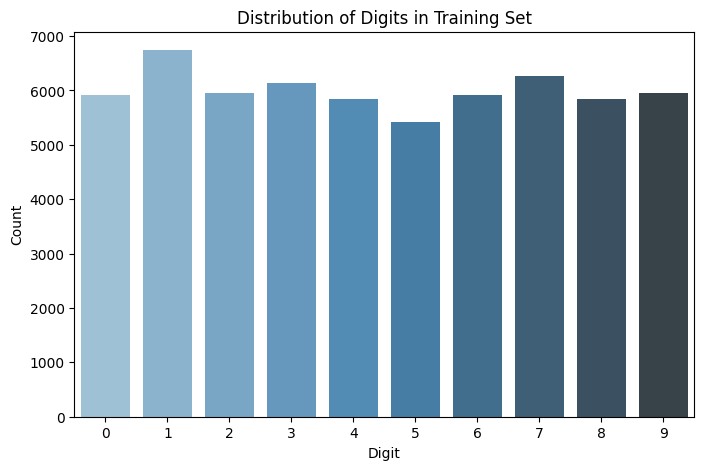

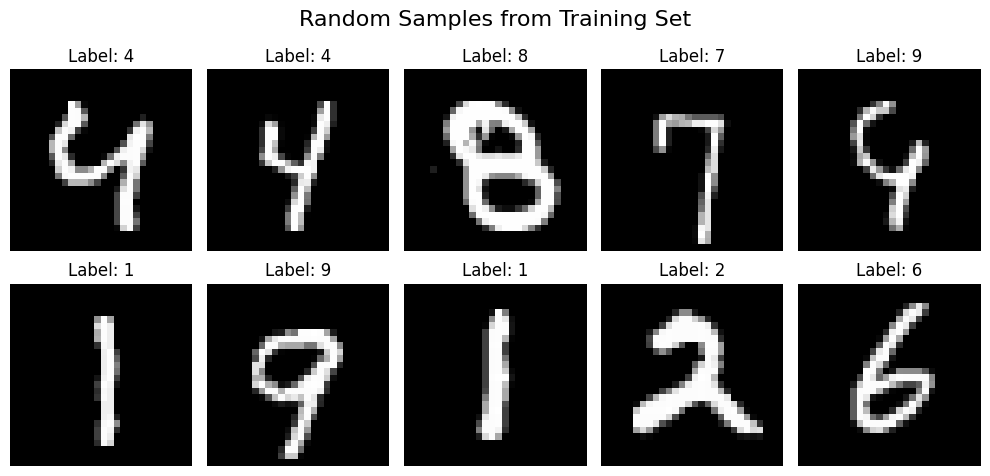

Pixel range in x_train: min = 0 , max = 255


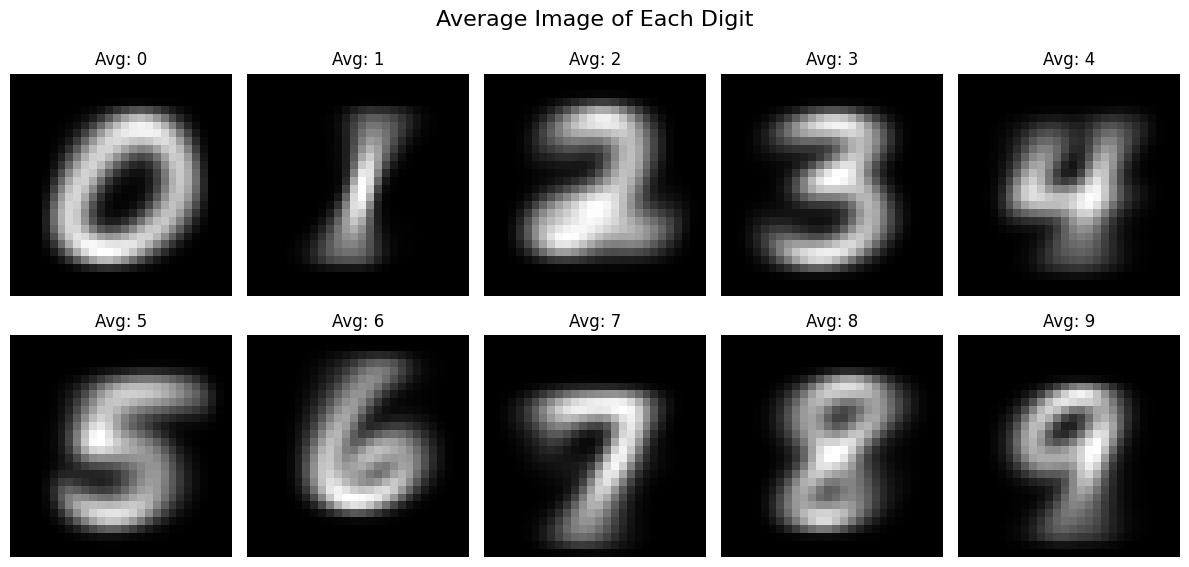

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data overview
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)
print("Unique labels:", np.unique(y_train))

# Plot class distribution
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8, 5))
sns.barplot(x=unique, y=counts, palette="Blues_d")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Distribution of Digits in Training Set")
plt.show()

# Display a few random digits from training set
import random

plt.figure(figsize=(10, 5))
for i in range(10):
    index = random.randint(0, len(x_train))
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Label: {y_train[index]}")
    plt.axis('off')
plt.suptitle("Random Samples from Training Set", fontsize=16)
plt.tight_layout()
plt.show()

# Check pixel value range
print("Pixel range in x_train: min =", x_train.min(), ", max =", x_train.max())

# Convert y_train to class labels (from one-hot if needed)
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train_labels = np.argmax(y_train, axis=1)
else:
    y_train_labels = y_train

# Plot average image per digit
mean_images = []
plt.figure(figsize=(12, 6))
for digit in range(10):
    digit_images = x_train[y_train_labels == digit]
    mean_image = digit_images.mean(axis=0)
    mean_images.append(mean_image)
    plt.subplot(2, 5, digit+1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(f"Avg: {digit}")
    plt.axis('off')
plt.suptitle("Average Image of Each Digit", fontsize=16)
plt.tight_layout()
plt.show()



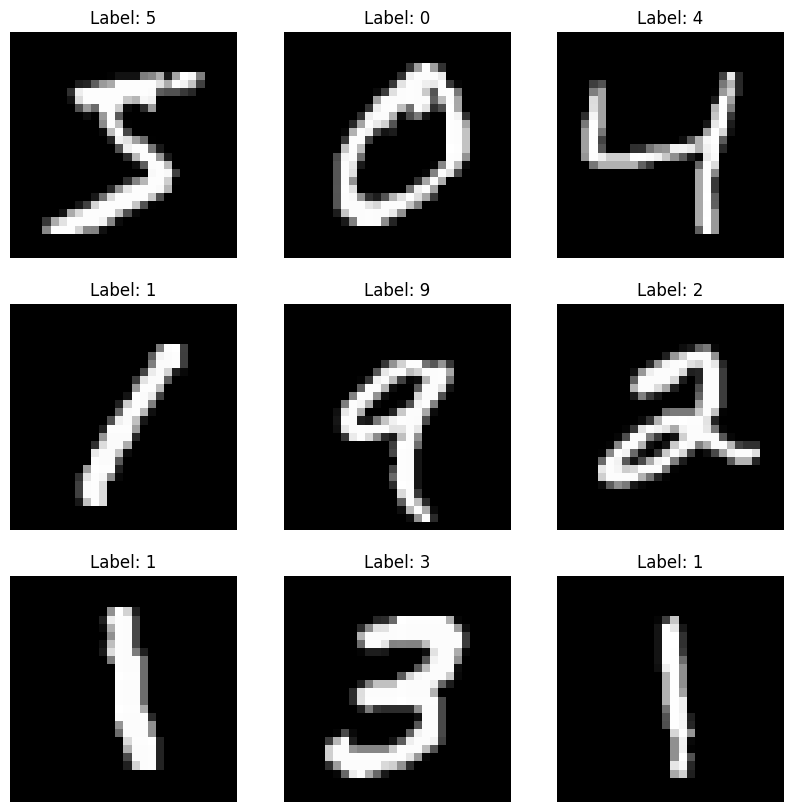

In [ ]:
#Visualize Some Digits
# Display the first 9 digits
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


Normalize and One-Hot Encode

In [ ]:
# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


4. MODEL BUILDING

In [ ]:
# 🏗️ 4. Model Building
#We design and compile a Convolutional Neural Network (CNN) using Keras. This model will learn to classify handwritten digits based on their pixel patterns.

In [ ]:
#Build the Neural Network
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Flatten 28x28 images to 784-element vector
    Dense(128, activation='relu'),       # Hidden layer
    Dense(10, activation='softmax')      # Output layer for 10 digits
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#Train the Model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8783 - loss: 0.4362 - val_accuracy: 0.9621 - val_loss: 0.1380
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9645 - loss: 0.1224 - val_accuracy: 0.9700 - val_loss: 0.1056
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9774 - loss: 0.0784 - val_accuracy: 0.9727 - val_loss: 0.0864
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9841 - loss: 0.0557 - val_accuracy: 0.9736 - val_loss: 0.0874
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9874 - loss: 0.0409 - val_accuracy: 0.9765 - val_loss: 0.0777


5. Model Evaluation

In [ ]:
# 📈 5. Model Evaluation
#After training the model, we evaluate its performance using accuracy, confusion matrix, and a classification report.

In [ ]:
#Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0923
Test Accuracy: 97.65%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


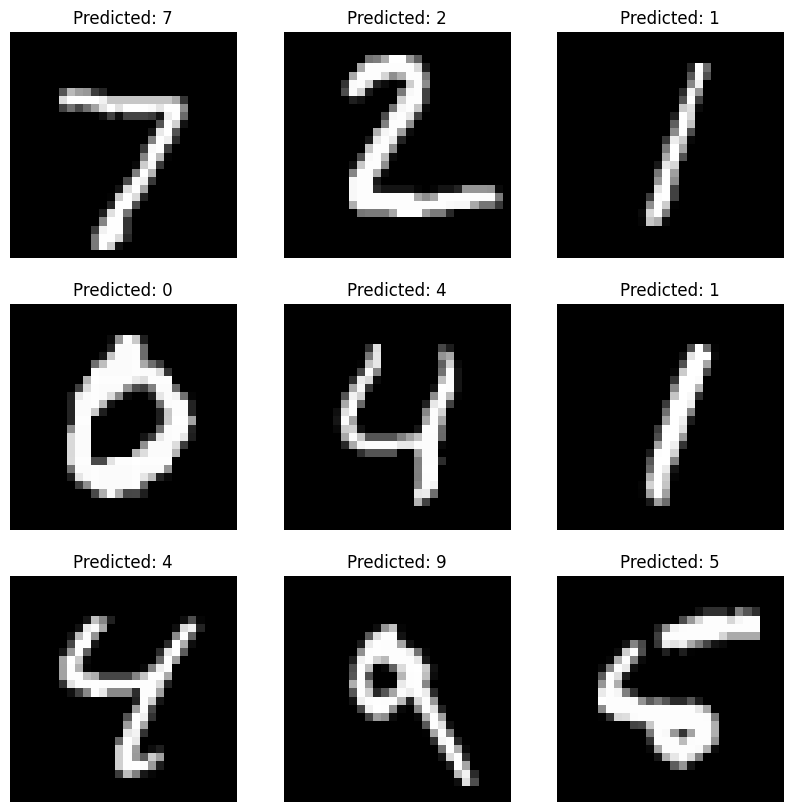

In [ ]:
#Predict and Visualize Results

# Predict the first 9 test samples
predictions = model.predict(x_test[:9])
predicted_labels = np.argmax(predictions, axis=1)

# Plot results
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.95      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



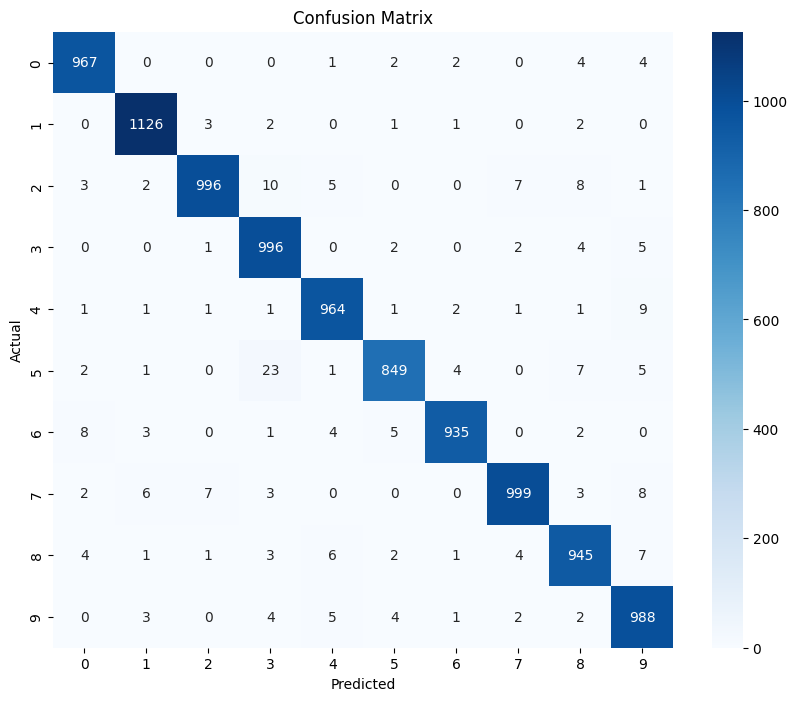

In [ ]:
#1. Add Confusion Matrix & Classification Report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot it
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


6. Model Saving

In [ ]:
# 💾 6. Model Saving
#We save the trained model for future use and make it downloadable from Google Colab.

In [ ]:
#Save and Load the Model
model.save("digit_recognition_cnn.h5")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
#load
from tensorflow.keras.models import load_model
model = load_model("digit_recognition_cnn.h5")
print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
#download
from google.colab import files
files.download("digit_recognition_cnn.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>